In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score, auc

In [5]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,  f1_score , precision_recall_curve , roc_auc_score 

In [6]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('creditcard.csv')

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.shape

(284807, 31)

In [11]:
data['Class'].value_counts()/data.shape[0]

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [12]:
data.isna().sum().sum()

np.int64(0)

In [13]:
data[data.duplicated()][['Class']].value_counts()

Class
0        1062
1          19
Name: count, dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [15]:
data['Class'].value_counts()/data.shape[0]

Class
0    0.998266
1    0.001734
Name: count, dtype: float64

if the model is trained on this data the results won't be realistic as it will be biased to the negative class most of the time

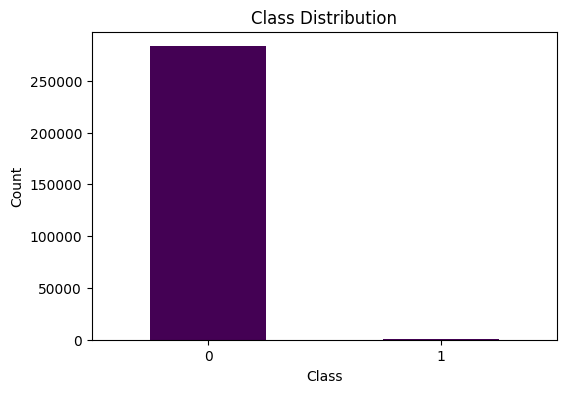

In [16]:
counts = data['Class'].value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind='bar', colormap='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='count'>

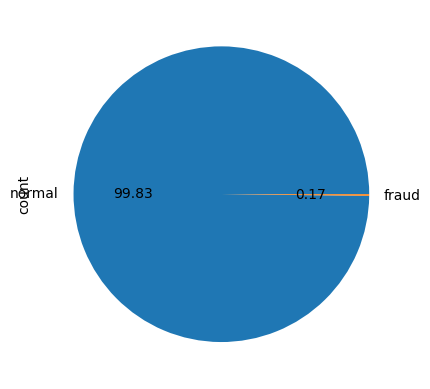

In [17]:
counts.plot.pie(labels = ['normal','fraud'],autopct='%.2f')

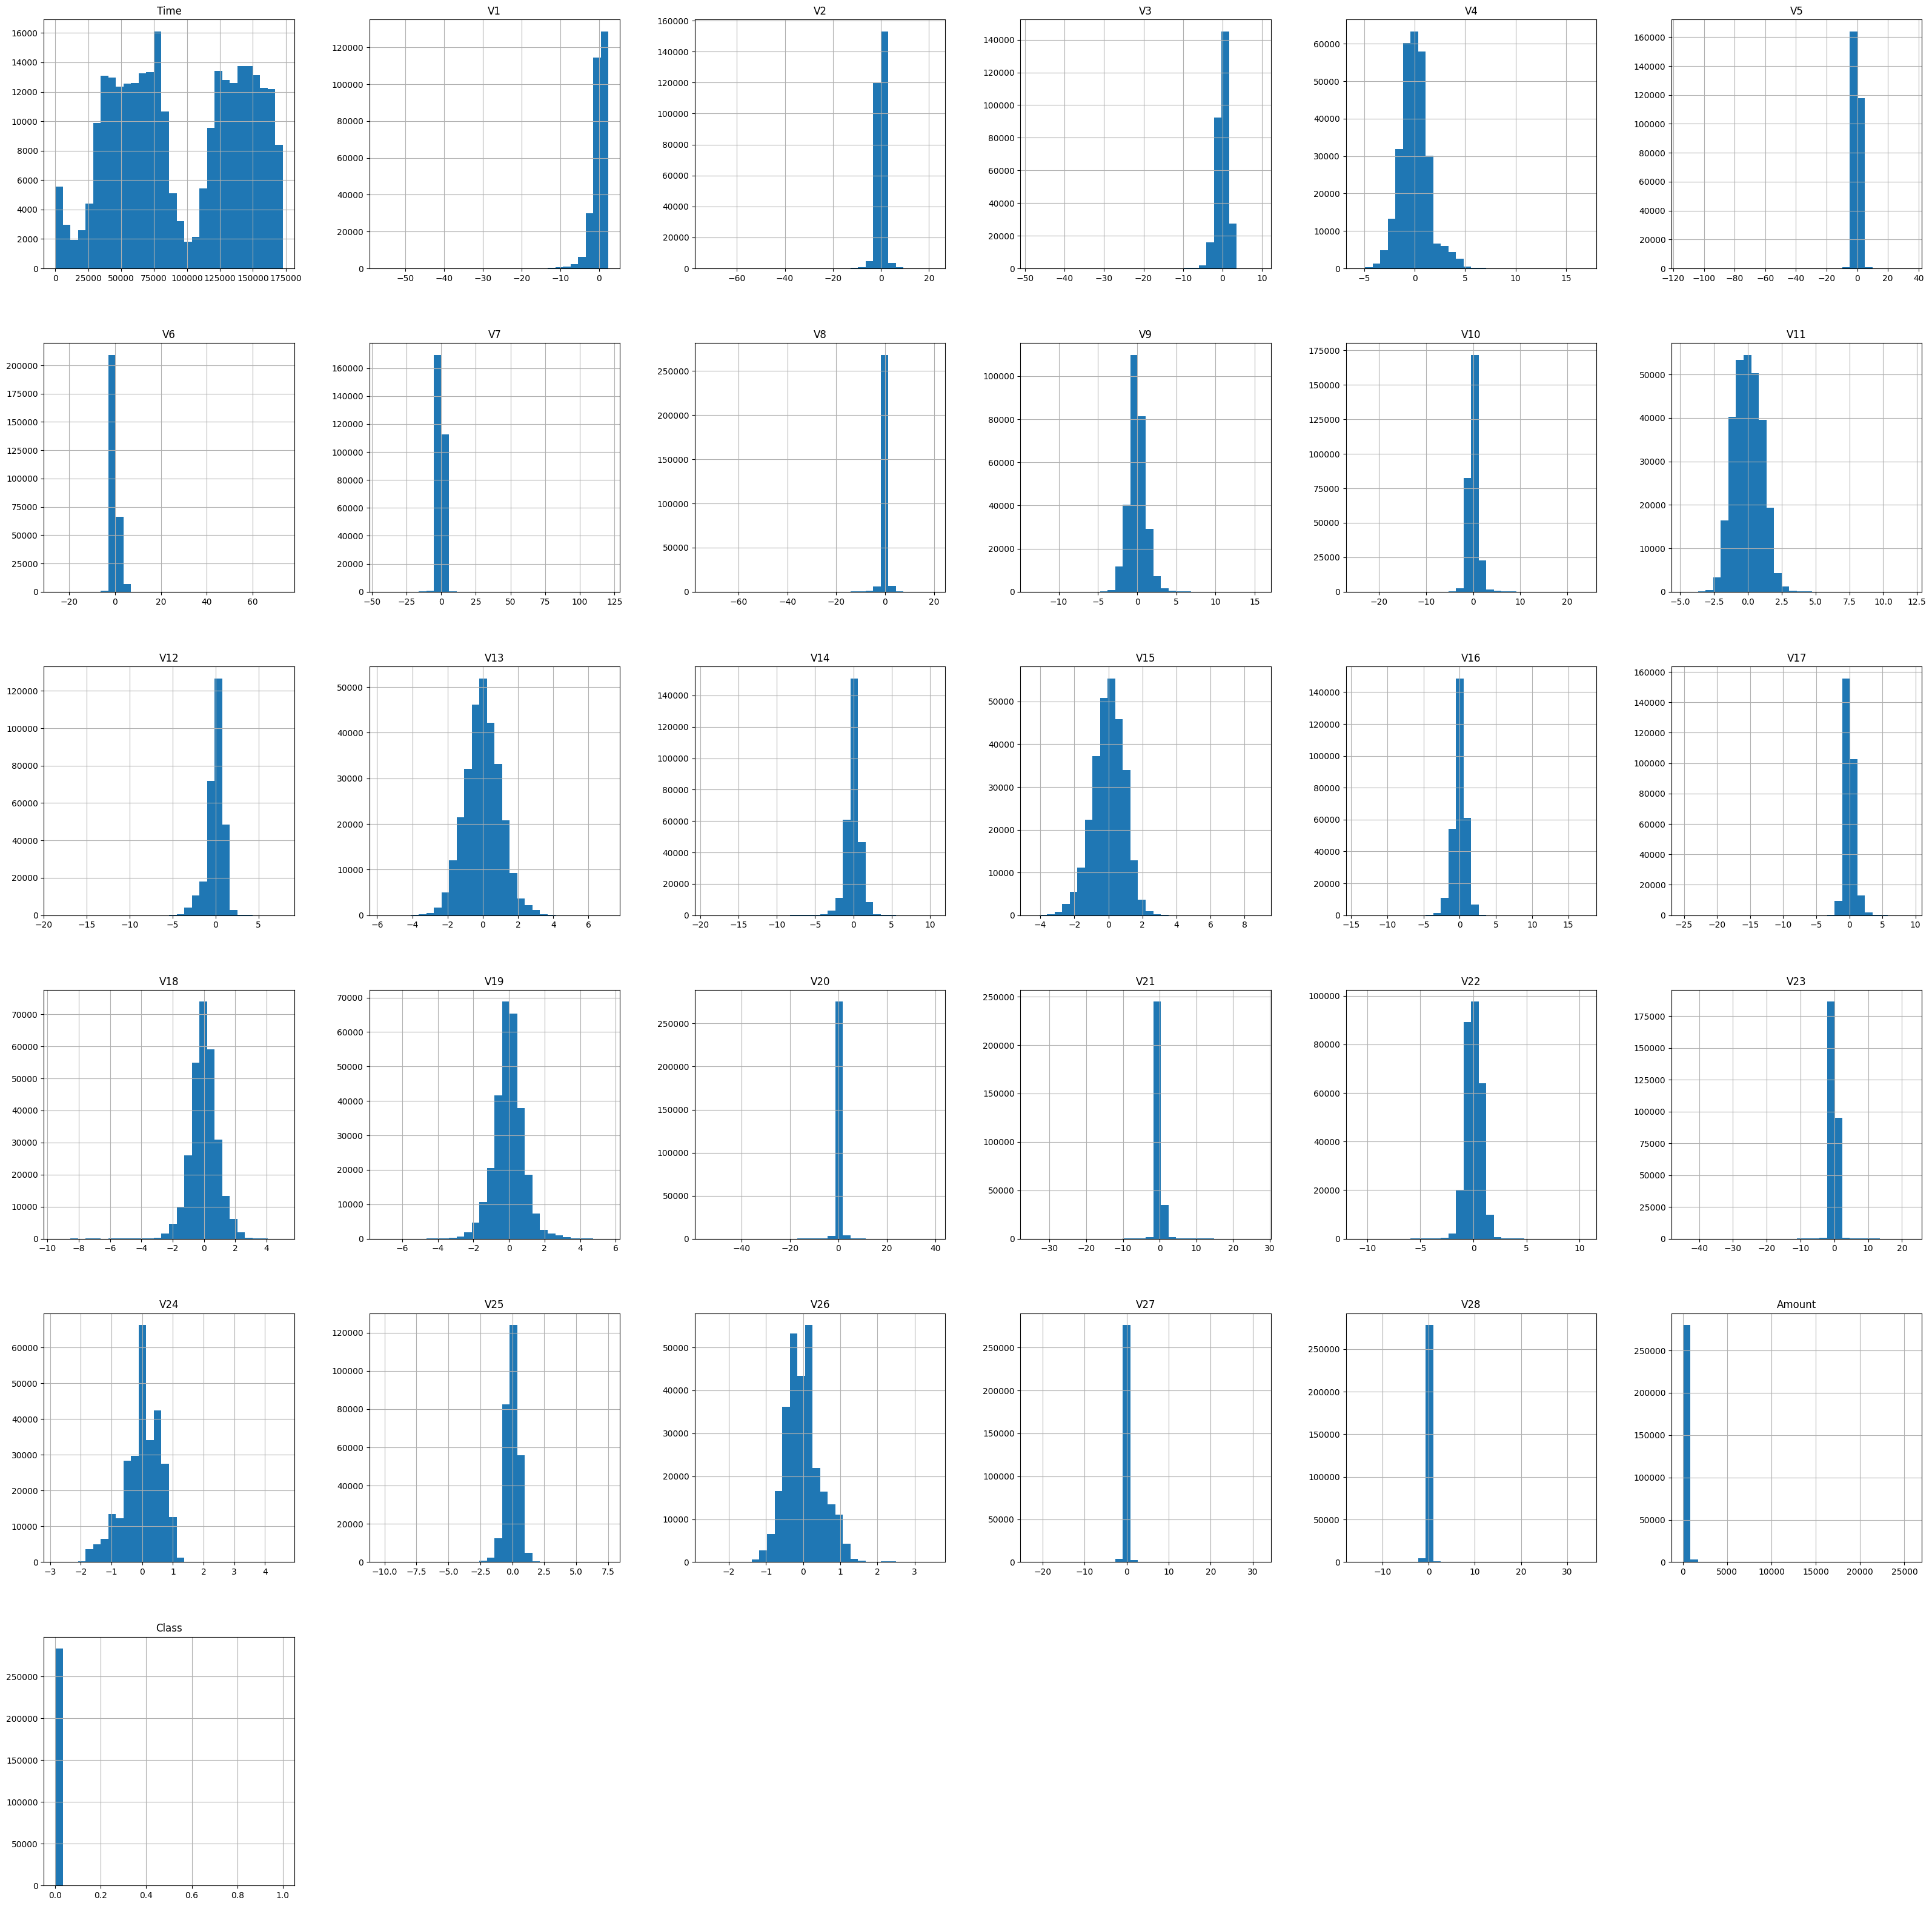

In [18]:
data.hist(bins=30,figsize=(40,40))
plt.show()

In [19]:
data_copy = data.copy()

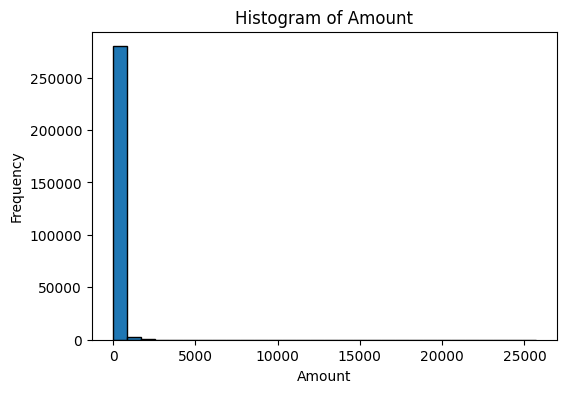

In [20]:
col = "Amount"
plt.figure(figsize=(6,4))
plt.hist((data[col]), bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [21]:
data_copy['Amount'].describe()

count    283745.000000
mean         88.472178
std         250.393576
min           0.000000
25%           5.600000
50%          22.000000
75%          77.520000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
data_copy['Amount_log'] = np.log1p(data_copy['Amount'])

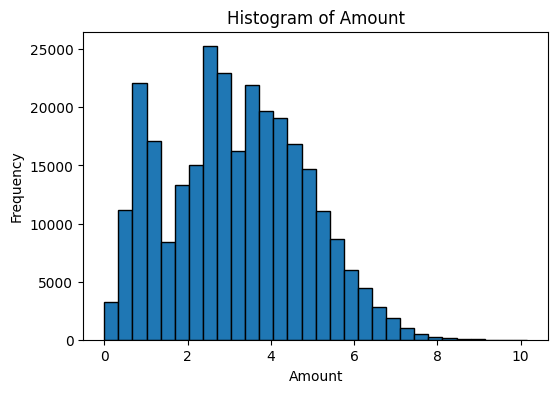

In [23]:
plt.figure(figsize=(6,4))
plt.hist(data_copy['Amount_log'], bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [24]:
data_copy['Amount_log'].describe()

count    283745.000000
mean          3.153710
std           1.657135
min           0.000000
25%           1.887070
50%           3.135494
75%           4.363353
max          10.153941
Name: Amount_log, dtype: float64

In [25]:
data_copy['Amount_Robust_sc'] = RobustScaler().fit_transform((data['Amount'].to_numpy().reshape(-1,1)))

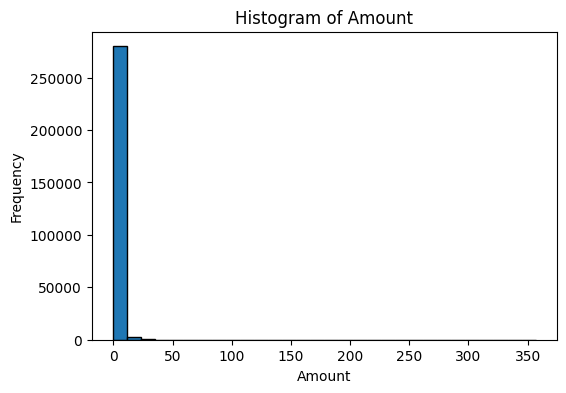

In [26]:
plt.figure(figsize=(6,4))
plt.hist(data_copy['Amount_Robust_sc'], bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [27]:
data_copy['Amount_Robust_sc'].describe()

count    283745.000000
mean          0.924252
std           3.481557
min          -0.305895
25%          -0.228031
50%           0.000000
75%           0.771969
max         356.912681
Name: Amount_Robust_sc, dtype: float64

In [28]:
scaler = StandardScaler()
data_copy['Amount_std_sc'] = scaler.fit_transform(data[['Amount']])

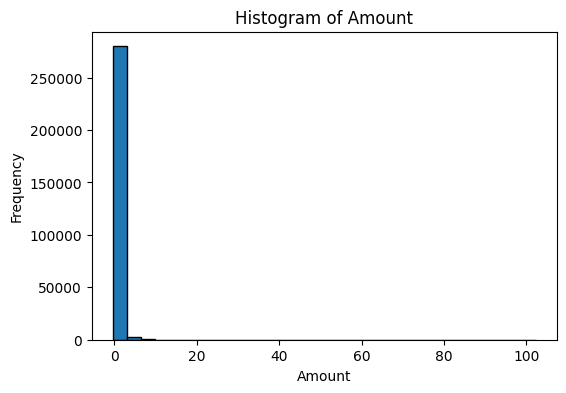

In [29]:
col = "Amount"
plt.figure(figsize=(6,4))
plt.hist(data_copy['Amount_std_sc'], bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [30]:
data_copy['Amount_std_sc'].describe()

count    2.837450e+05
mean     4.327188e-17
std      1.000002e+00
min     -3.533331e-01
25%     -3.309683e-01
50%     -2.654712e-01
75%     -4.373993e-02
max      1.022500e+02
Name: Amount_std_sc, dtype: float64

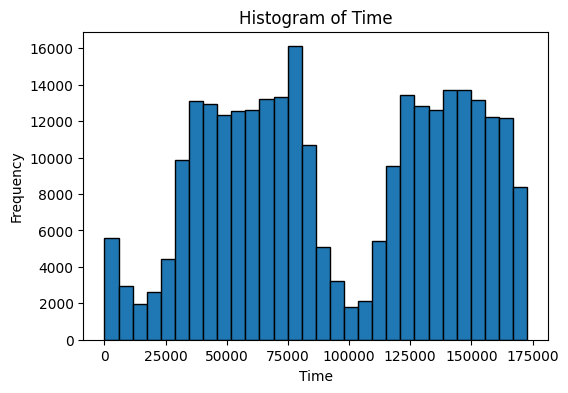

In [31]:
col = "Time"
plt.figure(figsize=(6,4))
plt.hist(data[col], bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [32]:
data_copy['Time'].describe()

count    283745.000000
mean      94810.629752
std       47479.710012
min           0.000000
25%       54208.000000
50%       84695.000000
75%      139297.000000
max      172792.000000
Name: Time, dtype: float64

In [33]:
scaler = StandardScaler()
data_copy['Time_std_sc'] = scaler.fit_transform(data_copy[['Time']]) 

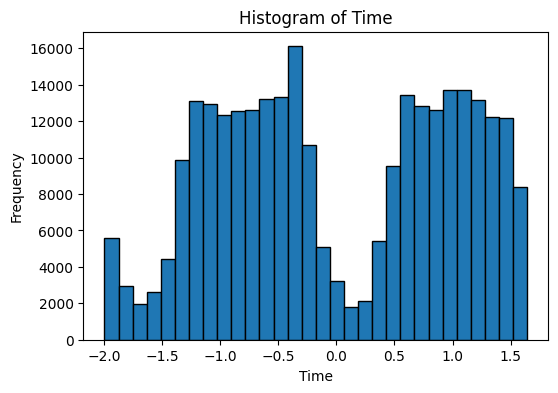

In [34]:
col = "Time"
plt.figure(figsize=(6,4))
plt.hist(data_copy['Time_std_sc'], bins=30, edgecolor='black')
plt.title(f"Histogram of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

In [35]:
data_copy['Time_std_sc'].describe()

count    2.837450e+05
mean    -1.025704e-16
std      1.000002e+00
min     -1.996870e+00
25%     -8.551590e-01
50%     -2.130520e-01
75%      9.369570e-01
max      1.642418e+00
Name: Time_std_sc, dtype: float64

In [36]:
X = data.drop(columns=['Class'])
y = data[['Class']]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,stratify=y,random_state=42)

In [38]:
#scaler = RobustScaler()
#X_train['Time'] = scaler.fit_transform(X_train['Time'].to_numpy().reshape(-1,1)) 
#X_test['Time'] = scaler.transform(X_test['Time'].to_numpy().reshape(-1,1)) 

In [39]:
#scaler = RobustScaler()
#X_train['Amount'] = scaler.fit_transform(X_train['Amount'].to_numpy().reshape(-1,1)) 
#X_test['Amount'] = scaler.transform(X_test['Amount'].to_numpy().reshape(-1,1)) 

In [40]:
from xgboost import XGBClassifier

In [41]:
from sklearn.linear_model import LogisticRegression 
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)
y_pred = LogisticModel.predict(X_test)
y_proba = LogisticModel.predict_proba(X_test)[:, 1]
print(f"Model: {LogisticModel.__class__.__name__}")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)}")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"F1-score is : {f1_score(y_test , y_pred)}")

Model: LogisticRegression
accuracy_score is : 0.9986255264409946
precision_score is : 0.6086956521739131
recall_score is : 0.5714285714285714
F1-score is : 0.5894736842105263


1. accuracy is very high but we can't be considered as a fair mertric (imbalance data)
2. precision means how confident the model when he says it's fraud
3. recall is very low (it missed about 33% of frauds)
4. the precision is about 0.03 higher than recall , this means FN is more than FP
5. F1_score is low 

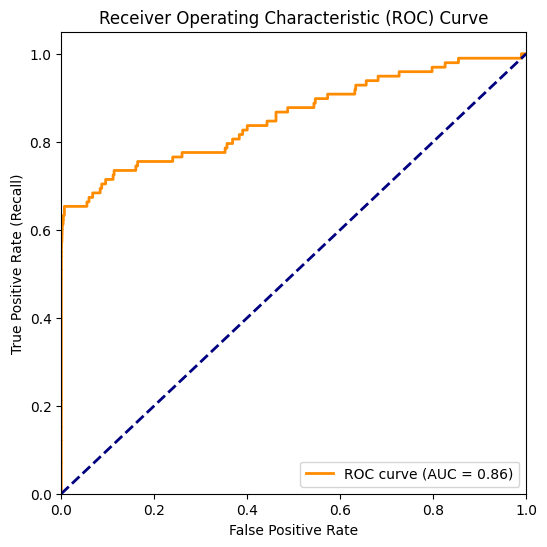

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

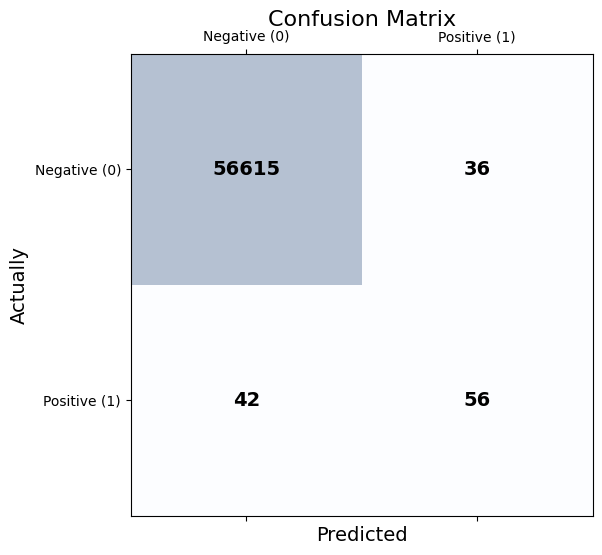

[[56615    36]
 [   42    56]]


In [43]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

### we have to fix this issue (imbalance dataset) which causes multiple issues in our model :
1. 33% of frauds are missed 
2. accuracy is misleading 
3. false negatives are very dangerous , we have to make them low as possible

 .

now i will try multiple ways to fix this issue trying to get a higher F1 score 

In [44]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]
print(f"Model: {xgb.__class__.__name__}")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)}")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"F1-score is : {f1_score(y_test , y_pred)}")

Model: XGBClassifier
accuracy_score is : 0.9991717915734198
precision_score is : 0.8311688311688312
recall_score is : 0.6530612244897959
F1-score is : 0.7314285714285714


In [45]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

# حساب F1 لكل threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# أفضل threshold
best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9994184919558053 
precision_score is : 0.9850746268656716
recall_score is : 0.673469387755102
f1_score is : 0.8
best threshold for max f1_score : 

best Threshold: 0.3566414
Precision (custom threshold): 0.9852941176470589
Recall (custom threshold): 0.6836734693877551
F1-score (custom threshold): 0.8072289156626506
best threshold for max recall : 

best Threshold: 0.19426855
Precision (custom threshold): 0.9078947368421053
Recall (custom threshold): 0.7040816326530612
F1-score (custom threshold): 0.7931034482758621


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: y should be a 1d array, got an array of shape (56749, 2) instead.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
def modeling(model):
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    score_acc = accuracy_score(y_test , y_predicted)
    score_precision = precision_score(y_test , y_predicted)
    score_recall = recall_score(y_test , y_predicted)
    score_f1 = f1_score(y_test , y_predicted)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy  : {score_acc:.4f}")
    print(f"Precision : {score_precision:.4f}")
    print(f"Recall    : {score_recall:.4f}")
    print(f"F1 Score  : {score_f1:.4f}")
    print("*"*30)

In [ ]:
models = [
    KNeighborsClassifier(),
    SVC(probability=True),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(),
    RidgeClassifier(),
    DecisionTreeClassifier(random_state=42),
    ExtraTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False , eval_metric='logloss', random_state=42),
    LGBMClassifier(random_state=42)
]

In [ ]:
#for model in models:
   #modeling(model)

In [ ]:
from sklearn.svm import LinearSVC
SVC = LinearSVC(class_weight={0:1,1:10})
SVC.fit(X_train,y_train)
y_predicted = SVC.predict(X_test)
score_acc = accuracy_score(y_test , y_predicted)
score_precision = precision_score(y_test , y_predicted)
score_recall = recall_score(y_test , y_predicted)
score_f1 = f1_score(y_test , y_predicted)

print(f"Model: {SVC.__class__.__name__}")
print(f"Accuracy  : {score_acc:.4f}")
print(f"Precision : {score_precision:.4f}")
print(f"Recall    : {score_recall:.4f}")
print(f"F1 Score  : {score_f1:.4f}")
print("*"*30)

Model: LinearSVC
Accuracy  : 0.9994
Precision : 0.8690
Recall    : 0.7684
F1 Score  : 0.8156
******************************


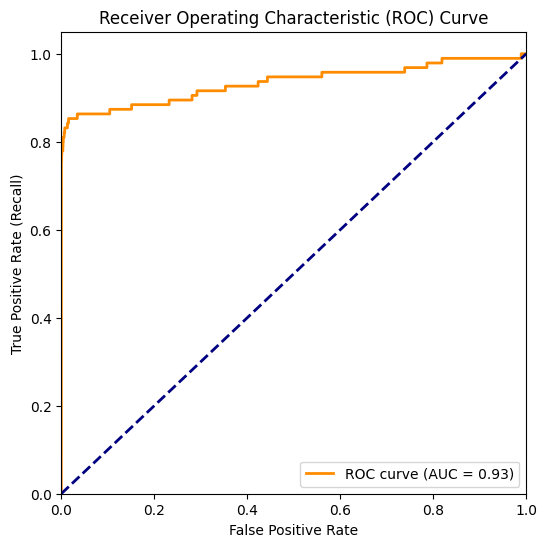

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
score_acc = accuracy_score(y_test , y_predicted)
score_precision = precision_score(y_test , y_predicted)
score_recall = recall_score(y_test , y_predicted)
score_f1 = f1_score(y_test , y_predicted)

print(f"Model: {model.__class__.__name__}")
print(f"Accuracy  : {score_acc:.4f}")
print(f"Precision : {score_precision:.4f}")
print(f"Recall    : {score_recall:.4f}")
print(f"F1 Score  : {score_f1:.4f}")
print("*"*30)

Model: RandomForestClassifier
Accuracy  : 0.9995
Precision : 0.9718
Recall    : 0.7263
F1 Score  : 0.8313
******************************


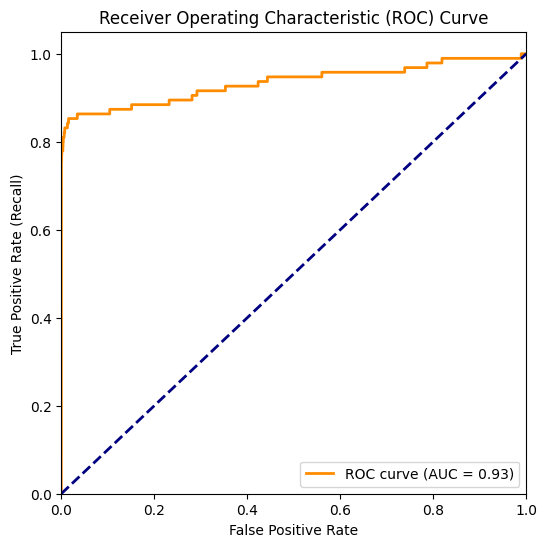

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

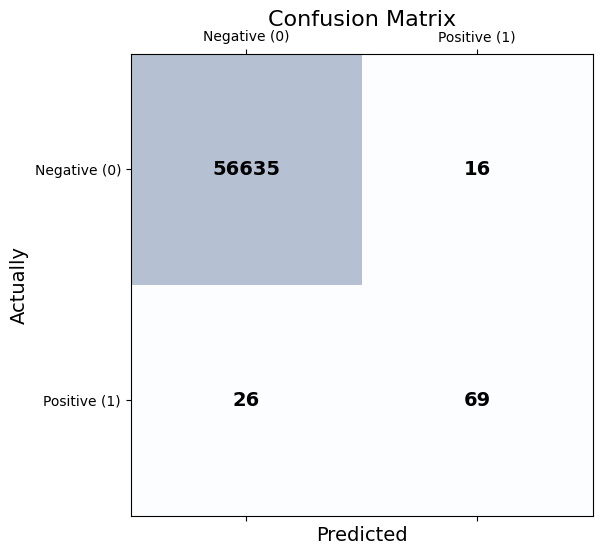

[[56635    16]
 [   26    69]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

results are way more better using this strong model

not bad as a start

### I will try multiple techniques  to fix this issue (imbalance dataset) which causes multiple issues in our model